# Classification Problem
1. Decison Tree
2. KNN 

# importing libraries and datset

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
iris_df = pd.DataFrame(data["data"] , columns = data["feature_names"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df["target"] = data["target"]
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
iris_df.loc[iris_df["target"] == 0 ,'label'] = 'setosa'
iris_df.loc[iris_df["target"] == 1 ,'label'] = 'versicolor'
iris_df.loc[iris_df["target"] == 2 ,'label'] = 'virginica'
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,label
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
# Creating X and y variable
X = iris_df.drop(["target" , "label"] , axis = 1)
y = iris_df["target"]

#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2)

## 1. Decision Tree

In [7]:
#importing and fitting the values
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train , y_train)

DecisionTreeClassifier()

In [8]:
#predicting the values
y_pred = dec_model.predict(X_test)

#seeing both the y_test and the predicted values in a df
predict_df = pd.DataFrame({"Actual": y_test, "Predictions": y_pred})
predict_df.head()

,Actual,Predictions
57,1,1
59,1,1
21,0,0
90,1,1
102,2,2


In [9]:
# the average difference between predicted and actual values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test  , y_pred)

0.0

In [10]:
#score
dec_model.score(X_test , y_test)

1.0

# 2. KNN 

In [11]:
#importing and fitting the values
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train , y_train)

KNeighborsClassifier()

In [12]:
y_pred= knn_model.predict(X_test)
print(y_pred)

[1 1 0 1 2 2 0 0 0 2 1 0 1 2 1 0 0 1 1 2 1 2 1 1 1 2 2 0 0 0]


In [13]:
predict_df = pd.DataFrame({"Actual": y_test, "Predictions": y_pred})
predict_df.head()

,Actual,Predictions
57,1,1
59,1,1
21,0,0
90,1,1
102,2,2


In [14]:
# the average difference between predicted and actual values
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test  , y_pred)

0.03333333333333333

In [15]:
# score of KNN
knn_model.score(X_test , y_test)

0.9666666666666667

# 3. Naive bayes classifier

In [3]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])
train, test, train_labels, test_labels = train_test_split(
   features,labels,test_size = 0.40, random_state = 42
)
from sklearn.naive_bayes import GaussianNB
GNBclf = GaussianNB()
model = GNBclf.fit(train, train_labels)
preds = GNBclf.predict(test)
print(preds)

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [4]:
model.score(test , test_labels)

0.9517543859649122

In [5]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels , preds)

0.9517543859649122

# PCA 

In [6]:
# import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
#import the breast _cancer dataset
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
data.keys()

# Check the output classes
print(data['target_names'])

# Check the input attributes
print(data['feature_names'])


['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
df1=pd.DataFrame(data['data'],columns=data['feature_names'])

# Scaling data before applying PCA
scaling=StandardScaler()
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)

# Check the dimensions
print(x.shape)

(569, 3)


In [9]:
# Check the values of eigen vectors produced by principal components
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.23271589,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796412, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853124,  0.06454984, -0.00931422,  0.02869952, -0.10429178,
        -0.07409152,  0.00273378, -0.02556366, -0

Text(0.5, 0, 'PC3')

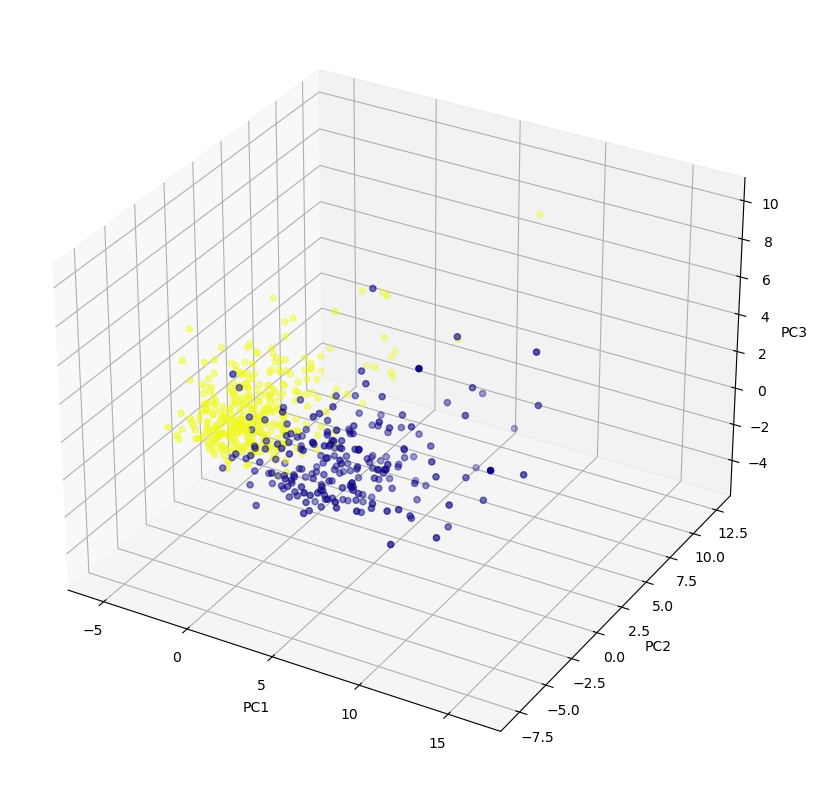

In [10]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')

# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [11]:
# check how much variance is explained by each principal component
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]


# Random Forest

In [13]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']
print(label_names)
print(labels[0])
print(feature_names[0])
print(features[0])

['malignant' 'benign']
0
mean radius
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [14]:
X_train , X_test , y_train , y_test = train_test_split(features , labels , test_size = 0.4 , random_state = 42)

In [15]:
X_train

array([[1.091e+01, 1.235e+01, 6.914e+01, ..., 3.194e-02, 2.143e-01,
        6.643e-02],
       [1.225e+01, 2.244e+01, 7.818e+01, ..., 6.335e-02, 3.100e-01,
        8.203e-02],
       [1.275e+01, 1.670e+01, 8.251e+01, ..., 8.045e-02, 3.071e-01,
        8.557e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train , y_train)
y_preds = model.predict(X_test)

# Evaluation metrics 

### 1. Confusion matrix 
### 2. Senstivity and specificity 
### 3. ROC curve 
### 4. Recall, precision, F1 Score 

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = fetch_openml(data_id=1464, return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

clf = make_pipeline(StandardScaler(), LogisticRegression(random_state=0))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[[141   1]
 [ 41   4]]


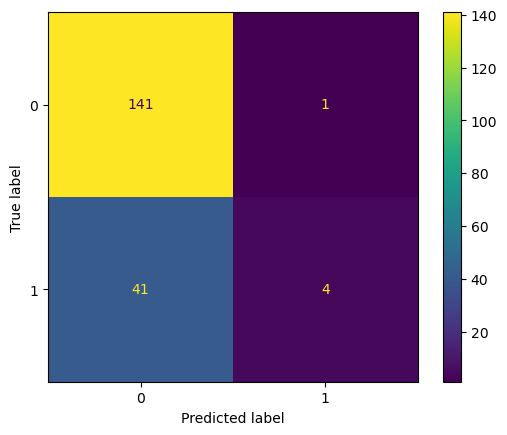

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm).plot()

[-0.19692027 -1.39657879 -1.13558083 -2.75971664 -0.22400426 -0.86721718
 -1.96455289 -0.49723429 -3.21896231 -0.82860468 -1.20627195 -0.22880845
 -0.69349582 -1.62376843 -1.08416093 -0.60141504 -1.37352549 -0.54141674
 -1.90289096 -0.71500986 -1.24654809 -0.71039997 -0.52630447 -1.92805482
 -0.89154923 -0.78186072 -2.14583039 -1.56838002 -0.23258652 -0.74510616
 -0.48686015 -2.19865729 -2.75971664 -0.60141504 -2.19174253 -1.33670874
 -2.72405039  0.62660623 -1.99368913 -2.75971664 -1.15197186 -0.86721718
  0.72707496 -1.43538173 -0.82860468 -1.63132457 -1.4379471  -1.68101478
 -2.07718765 -0.83616082 -0.582719   -1.59866676 -2.26416335 -2.86588357
 -1.35265283 -0.99489815 -1.97210903  0.98326873 -0.60141504 -1.44376968
 -1.84999801 -1.79838767 -1.74299926 -0.53386061 -3.34107333 -0.30475083
 -2.19174253 -2.72590833 -2.75971664 -0.72160593 -1.51388948 -2.8723514
 -0.27094252 -1.85755414 -1.1666372  -1.12431268 -1.13199707 -1.6275465
 -3.01738346 -0.41930572 -2.08474379 -2.67282093 -0.8

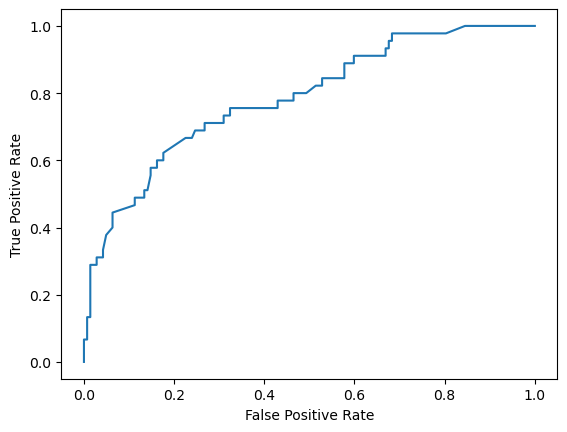

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)
print(y_score)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [35]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [37]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

Sensitivity :  0.9929577464788732


In [38]:
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Specificity :  0.08888888888888889
